In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [146]:


attrib = pd.read_csv('attributes.csv', delim_whitespace = True)
# Считывание данных из файла .data
data = pd.read_csv("communities.data", names = attrib['attributes'])  # Предполагается, что разделитель ","

print(data.shape)

data


(1994, 128)


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


## Удалим non-predictive features:

In [147]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)

In [148]:
data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


## Анализ пропущенных значений

In [149]:
data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]

In [150]:
print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

Из 123 фич 23 содержат пропущенные значения.



In [151]:
data[feat_miss].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,...,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,1993,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,...,50,72,30,15,77,63,38,72,3,51
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,...,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,129,80,19,81,17,55,23,15,19,12,...,189,14,48,54,12,27,69,13,126,22


OtherPerCap имеет только одно пропущенное значение, заполним средним. У остальных фич слишком много пропущенных значений, с ними придется попрощаться

In [152]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer = imputer.fit(data[['OtherPerCap']])
data[['OtherPerCap']] = imputer.transform(data[['OtherPerCap']])


In [153]:
data = data.dropna(axis=1)
print(data.shape)
data

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [154]:
X = data.loc[:, data.columns != 'ViolentCrimesPerPop']
y = data['ViolentCrimesPerPop']

In [155]:
X

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22


In [156]:
y

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [157]:
def linear_regr(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Предсказание на тестовом наборе
    y_pred = model.predict(X_test)
    
    # Оценка качества модели
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse,r2 = linear_regr(X,y)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 0.017528352717129252
Coefficient of Determination (R^2): 0.6339089446567829


## FastICA

Mean Squared Error (MSE): 0.024823021345435747
Coefficient of Determination (R^2): 0.48155504240411584


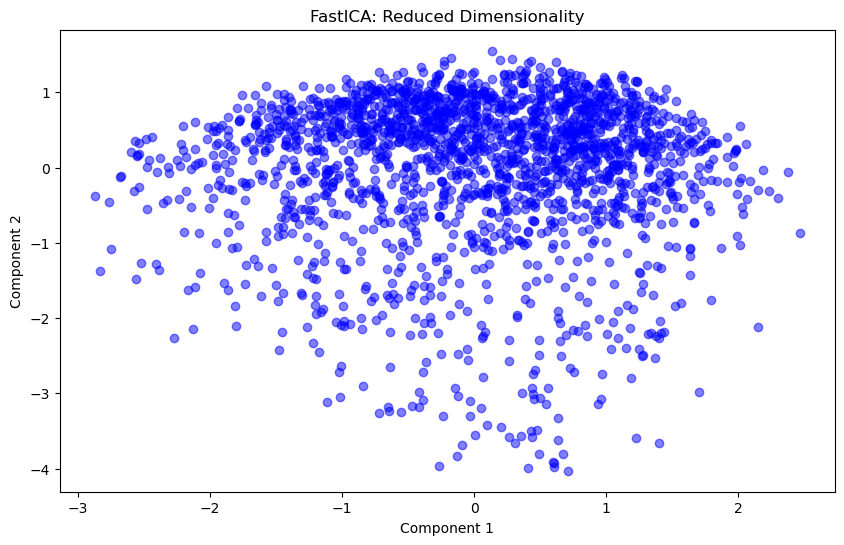

In [158]:
n_components = 2  # Желаемое количество компонент
ica = FastICA(n_components=n_components, random_state=42)
X_transformed = ica.fit_transform(X)

mse,r2 = linear_regr(X_transformed,y)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Визуализация сниженной размерности
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='b', marker='o', alpha=0.5)
plt.title('FastICA: Reduced Dimensionality')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Mean Squared Error (MSE): 0.017556936277741075
Coefficient of Determination (R^2): 0.6333119583889506


/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


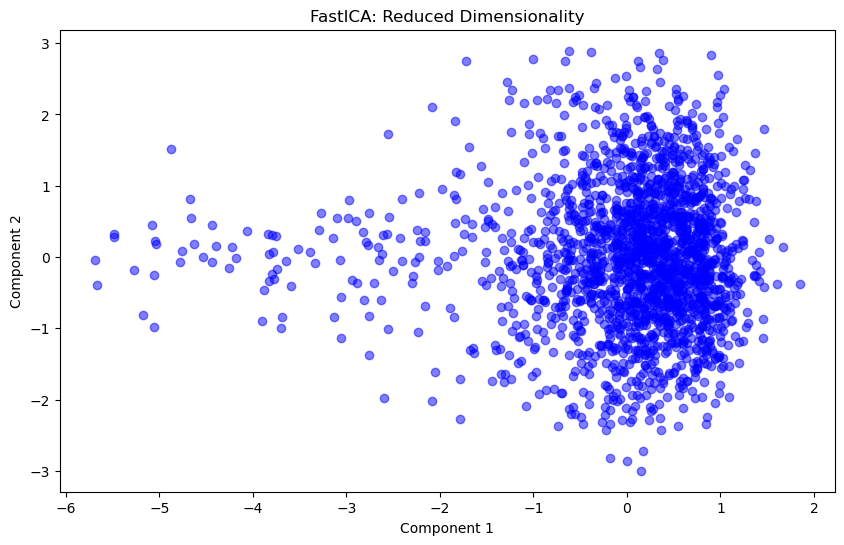

In [159]:
n_components = 9  # Желаемое количество компонент
ica = FastICA(n_components=n_components, random_state=42)
X_transformed = ica.fit_transform(X)

mse,r2 = linear_regr(X_transformed,y)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Визуализация сниженной размерности
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='b', marker='o', alpha=0.5)
plt.title('FastICA: Reduced Dimensionality')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Mean Squared Error (MSE): 0.017171194185427053
Coefficient of Determination (R^2): 0.6413684330585605


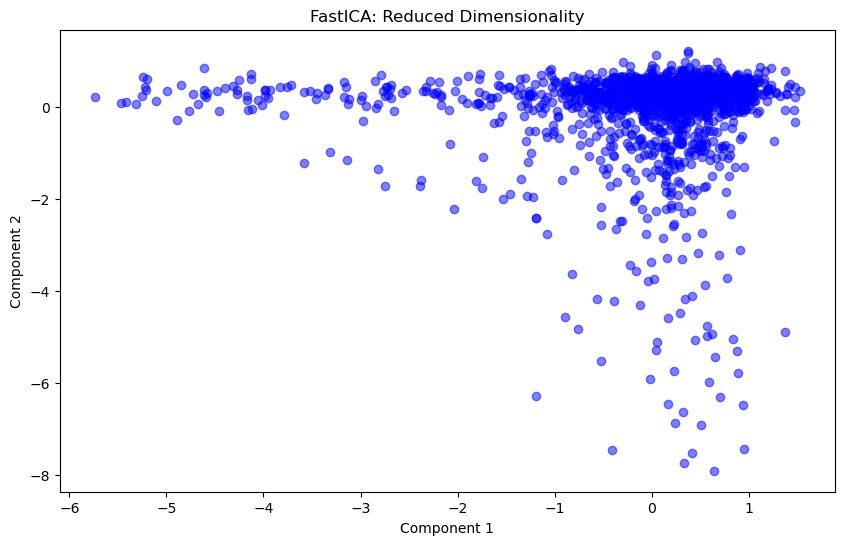

In [160]:
n_components = 14  # Желаемое количество компонент
ica = FastICA(n_components=n_components, random_state=42)
X_transformed = ica.fit_transform(X)

mse,r2 = linear_regr(X_transformed,y)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Визуализация сниженной размерности
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='b', marker='o', alpha=0.5)
plt.title('FastICA: Reduced Dimensionality')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [161]:
mse_min = 100000
n_components_best = 0
for n_components in range(1, X.shape[1]+1):
    ica = FastICA(n_components=n_components, random_state=42)
    X_transformed = ica.fit_transform(X)
    mse,r2 = linear_regr(X_transformed,y)
    if (mse < mse_min) :
        n_components_best = n_components
        mse_min = mse
        
print(mse_min)
print(n_components_best)
        

/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.016974038700775962
23


In [162]:
r2_max = 0
n_components_best = 0
for n_components in range(1, X.shape[1]+1):
    ica = FastICA(n_components=n_components, random_state=42)
    X_transformed = ica.fit_transform(X)
    mse,r2 = linear_regr(X_transformed,y)
    if (r2 > r2_max) :
        n_components_best = n_components
        r2_max = r2
        
print(r2_max)
print(n_components_best)
        

/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.6454861536799676
23


Mean Squared Error (MSE): 0.016974038700775962
Coefficient of Determination (R^2): 0.6454861536799676


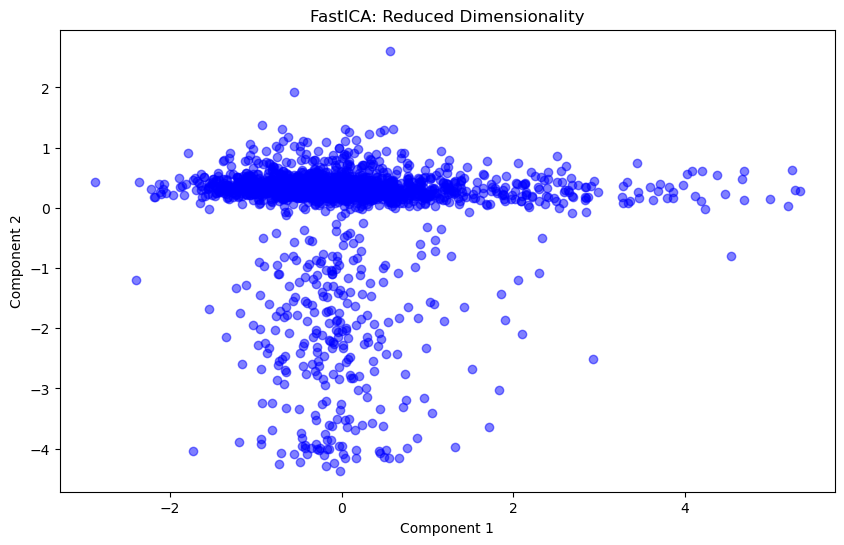

In [163]:
n_components = 23  # Желаемое количество компонент
ica = FastICA(n_components=n_components, random_state=42)
X_transformed = ica.fit_transform(X)

mse,r2 = linear_regr(X_transformed,y)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Визуализация сниженной размерности
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='b', marker='o', alpha=0.5)
plt.title('FastICA: Reduced Dimensionality')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


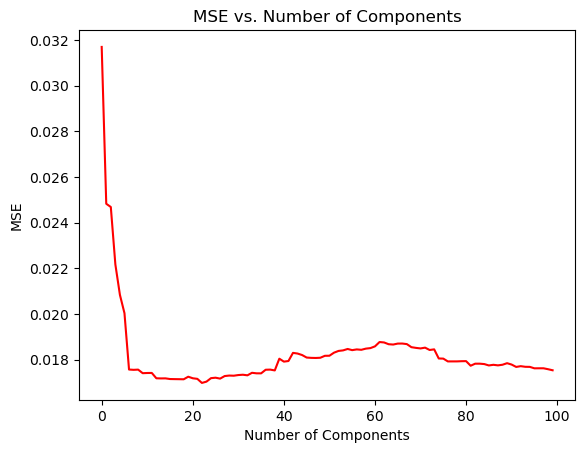

In [164]:
mse_arr = []
r2_arr = []
for n_components in range(1, X.shape[1]+1):
    ica = FastICA(n_components=n_components, random_state=42)
    X_transformed = ica.fit_transform(X)
    mse,r2 = linear_regr(X_transformed,y)
    mse_arr.append(mse)
    r2_arr.append(r2)
    
plt.plot(mse_arr, color ='red')
plt.title('MSE vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.show()

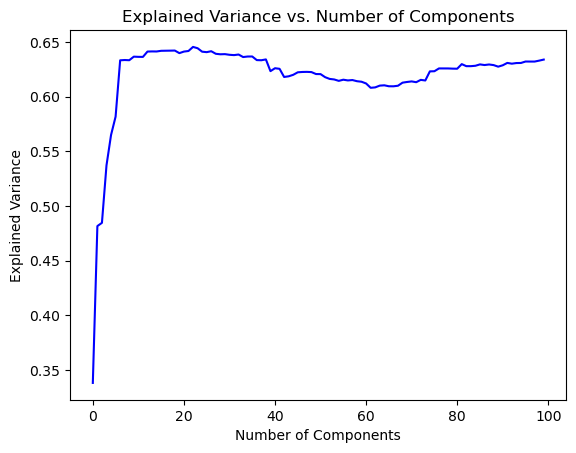

In [165]:
plt.plot(r2_arr, color ='blue')
plt.title('R^2 vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('R^2')
plt.show()

In [166]:
sc = StandardScaler()
X = sc.fit_transform(X)

mse_min = 100000
n_components_best = 0

mse_arr = []
r2_arr = []
for n_components in range(1, X.shape[1]+1):
    ica = FastICA(n_components=n_components, random_state=42)
    X_transformed = ica.fit_transform(X)
    mse,r2 = linear_regr(X_transformed,y)
    mse_arr.append(mse)
    r2_arr.append(r2)
    if (mse < mse_min) :
        n_components_best = n_components
        mse_min = mse
        
print(mse_min)
print(n_components_best)

/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/khumachbayramova/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.016848300597700917
22


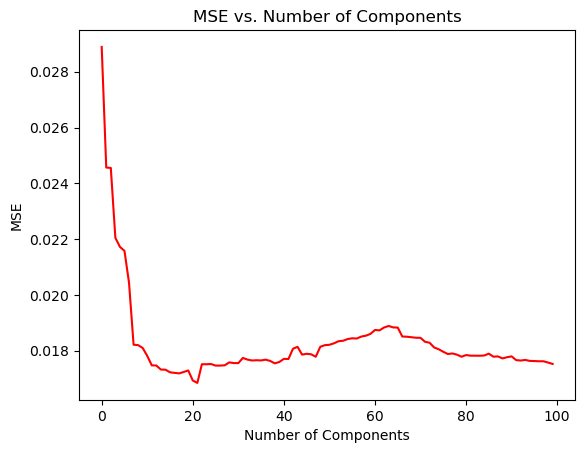

In [167]:
plt.plot(mse_arr, color ='red')
plt.title('MSE vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.show()

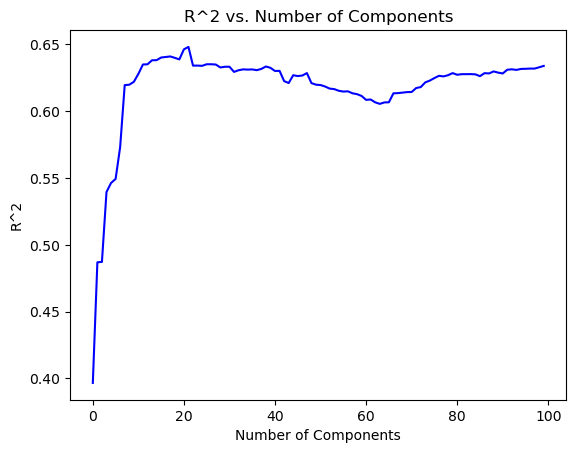

In [169]:
plt.plot(r2_arr, color ='blue')
plt.title('R^2 vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('R^2')
plt.show()